# EXPLORATION1
## 인공지능과 가위바위보 하기
### 가위바위보 분류기를 만들자

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os, glob
import shutil

## 1. 데이터 불러오기
1-1 데이터 사이즈 resize 하기                                                       
1-2 load_data()함수를 사용해서 가위,바위,보 데이터 읽어오기                                   
1-3 클래스 라벨링 하기(가위:0/바위:1/보:2)

In [2]:
base_dir=os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data_all_users"
members = ['HS','ES','KE','SM','SW','JS','JSS','TK','JY','JL']
#members = os.listdir(base_dir)
categories = ['rock', 'scissor', 'paper']
base_dst = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data"

for member in members:
    for category in categories:
        path = os.path.join(base_dir, member, category)
        print(path)
        for image in os.listdir(path):
            image_rename = member + '_' + image
            image_path_src = os.path.join(base_dir, member, category, image)
            image_path_dst = os.path.join(base_dst, category, image_rename)
            shutil.copyfile(image_path_src, image_path_dst)
            
print(f"총 {len(members)}명의 데이터가 모였습니다")

for category in categories:
    print(f"{category}에 {len(os.listdir('./data/'+category))}개 ")   

/aiffel/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data_all_users/HS/rock
/aiffel/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data_all_users/HS/scissor
/aiffel/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data_all_users/HS/paper
/aiffel/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data_all_users/ES/rock
/aiffel/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data_all_users/ES/scissor
/aiffel/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data_all_users/ES/paper
/aiffel/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data_all_users/KE/rock
/aiffel/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data_all_users/KE/scissor
/aiffel/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data_all_users/KE/paper
/aiffel/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data_all_users/SM/rock
/aiffel/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data_all_users/SM/scissor
/aiffel/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data_all_users/SM/paper
/aiffel/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data_all_users/SW/rock
/aiffel/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data_all_users/SW/scissor
/aiffel/aiffel/AIFFEL_PROJECT/EXPLORATION_1

In [3]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

In [4]:
image_dir_path = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1015  images to be resized.
1015  images resized.
가위 이미지 resize 완료!


In [5]:
image_dir_path = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1010  images to be resized.
1010  images resized.
바위 이미지 resize 완료!


In [6]:
image_dir_path = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1010  images to be resized.
1010  images resized.
보 이미지 resize 완료!


In [7]:
def load_data(img_path, number_of_data=3035): 
    # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("train_data 의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/data"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

train_data 의 이미지 개수는 3035 입니다.
x_train shape: (3035, 28, 28, 3)
y_train shape: (3035,)


In [8]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


라벨:  0


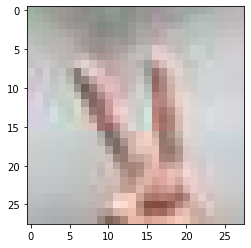

In [9]:
plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [10]:
print(x_train_norm.shape)

(3035, 28, 28, 3)


In [11]:
x_train_reshaped=x_train_norm.reshape(-1,28,28, 3)
print(x_train_reshaped.shape)

(3035, 28, 28, 3)


## 2. 딥러닝 네트워크 설계하기
2-1 Sequential Model을 사용하여 model 만들기                                      
2-2 model.summary() 메소드를 이용하여 딥러닝 네트워크 모델 확인

In [12]:
n_channel_1=128
n_channel_2=256
n_dense=64
n_train_epoch=3

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(n_train_epoch, activation='softmax'))
print('Model에 추가된 Layer 개수: ', len(model.layers))
model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                409664    
_________________________________________________________________
dense_1 (Dense)              (No

## 3. 딥러닝 네트워크 학습시키기
3-1 model.compile()과 model.fit()을 사용                                         
3-2 accuracy 확인

In [13]:
##딥러닝 네트워크 학습시키기
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=20)

Epoch 1/20
95/95 [==============================] - 6s 27ms/step - loss: 1.0642 - accuracy: 0.4084
Epoch 2/20
95/95 [==============================] - 1s 7ms/step - loss: 0.5221 - accuracy: 0.7934
Epoch 3/20
95/95 [==============================] - 1s 7ms/step - loss: 0.2475 - accuracy: 0.9327
Epoch 4/20
95/95 [==============================] - 1s 7ms/step - loss: 0.1017 - accuracy: 0.9780
Epoch 5/20
95/95 [==============================] - 1s 7ms/step - loss: 0.0649 - accuracy: 0.9848
Epoch 6/20
95/95 [==============================] - 1s 7ms/step - loss: 0.0192 - accuracy: 0.9978
Epoch 7/20
95/95 [==============================] - 1s 7ms/step - loss: 0.0116 - accuracy: 0.9992
Epoch 8/20
95/95 [==============================] - 1s 7ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 9/20
95/95 [==============================] - 1s 7ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 10/20
95/95 [==============================] - 1s 7ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 11/20
95/95 

## 4. 테스트 데이터로 성능 확인하기
4-1 x_test 데이터 만들기                                                                  
4-2 model.evaluate() 로 accuracy 확인

In [14]:
test_img_path = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/rock_scissor_paper/test/scissor"
resize_images(test_img_path)

print("가위 이미지 resize 완료!")

111  images to be resized.
111  images resized.
가위 이미지 resize 완료!


In [15]:
test_img_path = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/rock_scissor_paper/test/rock"
resize_images(test_img_path)

print("바위 이미지 resize 완료!")

122  images to be resized.
122  images resized.
바위 이미지 resize 완료!


In [16]:
test_img_path = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/rock_scissor_paper/test/paper"
resize_images(test_img_path)

print("보 이미지 resize 완료!")

117  images to be resized.
117  images resized.
보 이미지 resize 완료!


In [17]:
def load_data(test_img_path, number_of_data=350): 
    # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(test_img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(test_img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(test_img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("test_data 의 이미지 개수는", idx,"입니다.")
    return imgs, labels

test_img_path = os.getenv("HOME") + "/aiffel/AIFFEL_PROJECT/EXPLORATION_1/rock_scissor_paper/test"
(x_test, y_test)=load_data(test_img_path,350)
x_test_norm = x_test/255 # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

test_data 의 이미지 개수는 350 입니다.
x_test shape: (350, 28, 28, 3)
y_test shape: (350,)


In [18]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

11/11 - 1s - loss: 1042.0341 - accuracy: 0.4857
test_loss: 1042.0340576171875 
test_accuracy: 0.48571428656578064


## 5. 예측
5-1 model.predict()를 사용하여 model이 입력값을 보고 실제로 추론한 확률분포를 출력

In [19]:
predicted_result = model.predict(x_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [1. 0. 0.]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0


예측확률분포: [1. 0. 0.]
라벨: 2, 예측결과: 0


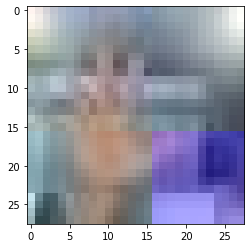

예측확률분포: [1. 0. 0.]
라벨: 1, 예측결과: 0


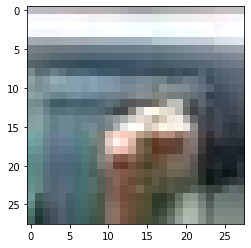

예측확률분포: [1. 0. 0.]
라벨: 1, 예측결과: 0


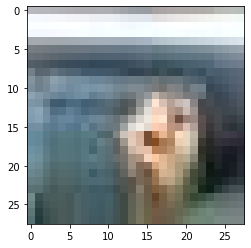

예측확률분포: [0. 1. 0.]
라벨: 0, 예측결과: 1


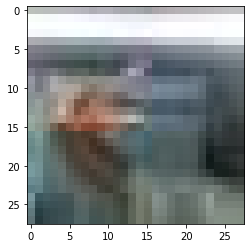

예측확률분포: [1. 0. 0.]
라벨: 1, 예측결과: 0


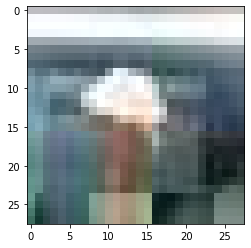

In [20]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list에서 random한 5개 확인
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 6. 프로젝트 정리

### 6-1 프로젝트 목적
가위바위보 분류기 만들기

### 6-2 Train/Test 데이터 개수
train_data : 총 10명의 3035개의 데이터                                                     
test_data : 총 1명의 350개의 데이터

### 6-3 과정
- 데이터 준비
- Sequential Model을 사용하여 딥러닝 네트워크 설계하기                                
- train_data 를 사용해 딥러닝 네트워크 학습시키기                                  
- test_data 로 성능 확인하기(test_accuracy,model.predict(),model.evaluate())              
- 더 좋은 네트워크를 만들기 위해 하이퍼파라미터들 바꾸어 보기 

### 6-4 결과
- (train_data,test_data,channel1,channel2,dense)=(300,350,32,64,64) 일 때, 30%c초반대의 정확도가 나옴.

- (train_data,test_data,channel1,channel2,dense)=(3035,350,128,256,64) 일 때, 가장 높게 나온 약 48% 가 나옴.

데이터의 수를 10배 이상 늘렸음에도 불구하고 정확도는 15%밖에 오르지 않았다. 이를 통해 데이터 개수뿐만 아니라 데이터셋의 구성이 중요하다는 것을 알 수 있었다. 데이터의 다양성이 보장되어야 하고, 데이터의 개수가 많아야 좋은 딥러닝 모델을 학습시킬 수 있다.
